# *Model Interferometry* | Lab-Session #3
## Jan-20-2021 13:45

This jupyter notebook is a used to collect and analyse data during today's lab session

In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as consts
import os
from csvlib import *
from scipy.optimize import curve_fit

# Display mpl in notebook format
%matplotlib inline

# Data Collection

In [9]:
# open CSV files to numpy array
csvs = list_csv(PRINT='True')   # Lists CSV files in a given directory
DATA = pd.read_csv(csvs[0])     # Gets the CSV file as a Pandas Data Frame
data = DATA.to_numpy().T        # Gets data as a numpy array
DATA                            # Prints pretty PANDAS data frame

List of .csv files in .
	 0 : moving_mirror_00.csv


,Time,Voltage,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0.000,-256,NaN,Record Length,2.50E+03
1,0.002,-256,NaN,Sample Interval,2.00E-03
2,0.004,-256,NaN,Trigger Point,0.00E+00
3,0.006,-256,NaN,NaN,NaN
4,0.008,-256,NaN,NaN,NaN
...,...,...,...,...,...
2495,4.990,-256,NaN,NaN,NaN
2496,4.992,-256,NaN,NaN,NaN
2497,4.994,-256,NaN,NaN,NaN
2498,4.996,-256,NaN,NaN,NaN


# Data Analysis

[27.17145553 15.85458081  0.31722556  8.87206413]


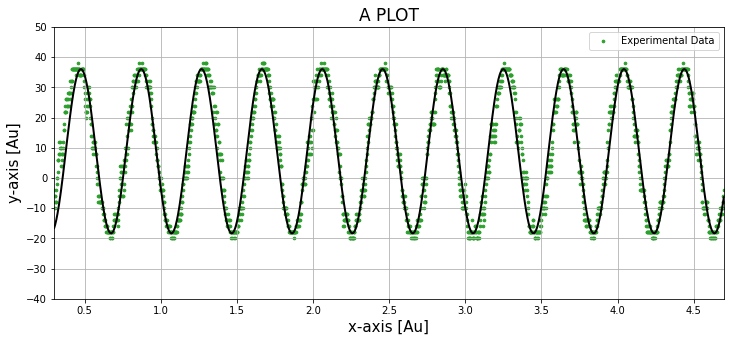

In [97]:
# Data fitting
# let's get some data x,y
Npts = 1000
crop = 150
x = data[0][crop:-crop].astype(float)
y = data[1][crop:-crop].astype(float)

# Example of trying to fit a function with 3 parameters 
fit = lambda x,a,b,c,d: a*np.sin(b*x + c) + d

params, _ = curve_fit(fit,x,y,p0=[30,5.03*np.pi,np.pi/2,10],\
    bounds=([20,4*np.pi,0,0],[40,7*np.pi,np.pi,20]))

# Define the figure and plot parameters
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_title('A PLOT',fontsize=17)
ax.set_xlabel('x-axis [Au]',fontsize=15)
ax.set_ylabel('y-axis [Au]',fontsize=15)
ax.set_xlim(min(x),max(x))
ax.set_ylim(-40,50)

# Plot the actual elements
ax.scatter(x,y,color = 'C2',s = 7, marker = 'o',label='Experimental Data')
yy = fit(x,*[30,5.05*np.pi,0.1*np.pi,8.5])
yy = fit(x,*params)
ax.plot(x,yy, color = 'black', lw = 2)
print(params)

ax.legend(fontsize = 10)
ax.grid()